In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

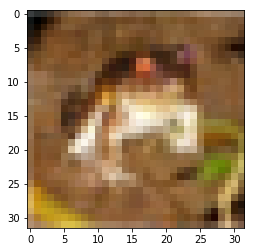

In [6]:
plt.imshow(x_train[0])

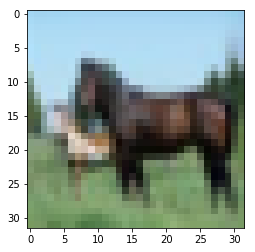

In [7]:
plt.imshow(x_train[12])

In [8]:
x_train.max()

255

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
from keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [13]:
from keras.models import Sequential

In [14]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# 128,256,512
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [17]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 73s 1ms/step - loss: 1.5314 - acc: 0.4485
Epoch 2/10
50000/50000 [==============================] - 86s 2ms/step - loss: 1.1797 - acc: 0.5882
Epoch 3/10
50000/50000 [==============================] - 94s 2ms/step - loss: 1.0297 - acc: 0.6431
Epoch 4/10
50000/50000 [==============================] - 106s 2ms/step - loss: 0.9260 - acc: 0.6822
Epoch 5/10
50000/50000 [==============================] - 111s 2ms/step - loss: 0.8462 - acc: 0.7091
Epoch 6/10
50000/50000 [==============================] - 106s 2ms/step - loss: 0.7819 - acc: 0.7332
Epoch 7/10
50000/50000 [==============================] - 106s 2ms/step - loss: 0.7367 - acc: 0.7485
Epoch 8/10
50000/50000 [==============================] - 108s 2ms/step - loss: 0.6932 - acc: 0.7682
Epoch 9/10
50000/50000 [==============================] - 111s 2ms/step - loss: 0.6614 - acc: 0.7767
Epoch 10/10
50000/50000 [==============================] - 103s 2ms/step - loss: 0.6339 - acc:

In [18]:
model.metrics_names

['loss', 'acc']

In [19]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 6s 568us/step


[1.2875896320343017, 0.6451]

In [20]:
from sklearn.metrics import classification_report

In [21]:
predictions = model.predict_classes(x_test)

In [22]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.64      0.68      1000
          1       0.86      0.76      0.81      1000
          2       0.41      0.71      0.52      1000
          3       0.51      0.38      0.44      1000
          4       0.49      0.74      0.59      1000
          5       0.66      0.44      0.52      1000
          6       0.67      0.80      0.73      1000
          7       0.80      0.64      0.71      1000
          8       0.84      0.64      0.73      1000
          9       0.82      0.70      0.75      1000

avg / total       0.68      0.65      0.65     10000



In [23]:
model.save('mycifar10.h5')